In [ ]:
# Install the required libraries
#SAM
!pip install git+https://github.com/facebookresearch/segment-anything.git
#Transformers
!pip install -q git+https://github.com/huggingface/transformers.git
#Datasets to prepare data and monai if you want to use special loss functions
!pip install datasets
!pip install -q monai
#Patchify to divide large images into smaller patches for training. (Not necessary for smaller images)
!pip install patchify

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-v57xkmrq
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-v57xkmrq
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [31]:
!pip install -q monai


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install datasets


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import os

import random
from scipy import ndimage

In [ ]:
from patchify import patchify  #Only to handle large images

In [52]:
import os

# Set the directory path
directory = r'C:\Users\HP\Desktop\Ultralytics_RTDeTr\Dataset\WCEBleedGen\bleeding\Annotations'

# Iterate through files in the directory
for filename in os.listdir(directory):
    if filename.startswith("ann-") and filename.endswith(".png"):
        # Extract the number from the filename
        number = filename.split("-")[1].split(".")[0]  # Extracts the number between '-' and '.png'
        new_filename = f"img-{number}.png"
        
        # Rename the file
        os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
        print(f"Renamed {filename} to {new_filename}")


Renamed ann- (1).png to img- (1).png
Renamed ann- (10).png to img- (10).png
Renamed ann- (100).png to img- (100).png
Renamed ann- (1000).png to img- (1000).png
Renamed ann- (1001).png to img- (1001).png
Renamed ann- (1002).png to img- (1002).png
Renamed ann- (1003).png to img- (1003).png
Renamed ann- (1004).png to img- (1004).png
Renamed ann- (1005).png to img- (1005).png
Renamed ann- (1006).png to img- (1006).png
Renamed ann- (1007).png to img- (1007).png
Renamed ann- (1008).png to img- (1008).png
Renamed ann- (1009).png to img- (1009).png
Renamed ann- (101).png to img- (101).png
Renamed ann- (1010).png to img- (1010).png
Renamed ann- (1011).png to img- (1011).png
Renamed ann- (1012).png to img- (1012).png
Renamed ann- (1013).png to img- (1013).png
Renamed ann- (1014).png to img- (1014).png
Renamed ann- (1015).png to img- (1015).png
Renamed ann- (1016).png to img- (1016).png
Renamed ann- (1017).png to img- (1017).png
Renamed ann- (1018).png to img- (1018).png
Renamed ann- (1019).png t

Renamed ann- (1211).png to img- (1211).png
Renamed ann- (1212).png to img- (1212).png
Renamed ann- (1213).png to img- (1213).png
Renamed ann- (1214).png to img- (1214).png
Renamed ann- (1215).png to img- (1215).png
Renamed ann- (1216).png to img- (1216).png
Renamed ann- (1217).png to img- (1217).png
Renamed ann- (1218).png to img- (1218).png
Renamed ann- (1219).png to img- (1219).png
Renamed ann- (122).png to img- (122).png
Renamed ann- (1220).png to img- (1220).png
Renamed ann- (1221).png to img- (1221).png
Renamed ann- (1222).png to img- (1222).png
Renamed ann- (1223).png to img- (1223).png
Renamed ann- (1224).png to img- (1224).png
Renamed ann- (1225).png to img- (1225).png
Renamed ann- (1226).png to img- (1226).png
Renamed ann- (1227).png to img- (1227).png
Renamed ann- (1228).png to img- (1228).png
Renamed ann- (1229).png to img- (1229).png
Renamed ann- (123).png to img- (123).png
Renamed ann- (1230).png to img- (1230).png
Renamed ann- (1231).png to img- (1231).png
Renamed ann- (1

Renamed ann- (235).png to img- (235).png
Renamed ann- (236).png to img- (236).png
Renamed ann- (237).png to img- (237).png
Renamed ann- (238).png to img- (238).png
Renamed ann- (239).png to img- (239).png
Renamed ann- (24).png to img- (24).png
Renamed ann- (240).png to img- (240).png
Renamed ann- (241).png to img- (241).png
Renamed ann- (242).png to img- (242).png
Renamed ann- (243).png to img- (243).png
Renamed ann- (244).png to img- (244).png
Renamed ann- (245).png to img- (245).png
Renamed ann- (246).png to img- (246).png
Renamed ann- (247).png to img- (247).png
Renamed ann- (248).png to img- (248).png
Renamed ann- (249).png to img- (249).png
Renamed ann- (25).png to img- (25).png
Renamed ann- (250).png to img- (250).png
Renamed ann- (251).png to img- (251).png
Renamed ann- (252).png to img- (252).png
Renamed ann- (253).png to img- (253).png
Renamed ann- (254).png to img- (254).png
Renamed ann- (255).png to img- (255).png
Renamed ann- (256).png to img- (256).png
Renamed ann- (257).p

Renamed ann- (421).png to img- (421).png
Renamed ann- (422).png to img- (422).png
Renamed ann- (423).png to img- (423).png
Renamed ann- (424).png to img- (424).png
Renamed ann- (425).png to img- (425).png
Renamed ann- (426).png to img- (426).png
Renamed ann- (427).png to img- (427).png
Renamed ann- (428).png to img- (428).png
Renamed ann- (429).png to img- (429).png
Renamed ann- (43).png to img- (43).png
Renamed ann- (430).png to img- (430).png
Renamed ann- (431).png to img- (431).png
Renamed ann- (432).png to img- (432).png
Renamed ann- (433).png to img- (433).png
Renamed ann- (434).png to img- (434).png
Renamed ann- (435).png to img- (435).png
Renamed ann- (436).png to img- (436).png
Renamed ann- (437).png to img- (437).png
Renamed ann- (438).png to img- (438).png
Renamed ann- (439).png to img- (439).png
Renamed ann- (44).png to img- (44).png
Renamed ann- (440).png to img- (440).png
Renamed ann- (441).png to img- (441).png
Renamed ann- (442).png to img- (442).png
Renamed ann- (443).p

Renamed ann- (605).png to img- (605).png
Renamed ann- (606).png to img- (606).png
Renamed ann- (607).png to img- (607).png
Renamed ann- (608).png to img- (608).png
Renamed ann- (609).png to img- (609).png
Renamed ann- (61).png to img- (61).png
Renamed ann- (610).png to img- (610).png
Renamed ann- (611).png to img- (611).png
Renamed ann- (612).png to img- (612).png
Renamed ann- (613).png to img- (613).png
Renamed ann- (614).png to img- (614).png
Renamed ann- (615).png to img- (615).png
Renamed ann- (616).png to img- (616).png
Renamed ann- (617).png to img- (617).png
Renamed ann- (618).png to img- (618).png
Renamed ann- (619).png to img- (619).png
Renamed ann- (62).png to img- (62).png
Renamed ann- (620).png to img- (620).png
Renamed ann- (621).png to img- (621).png
Renamed ann- (622).png to img- (622).png
Renamed ann- (623).png to img- (623).png
Renamed ann- (624).png to img- (624).png
Renamed ann- (625).png to img- (625).png
Renamed ann- (626).png to img- (626).png
Renamed ann- (627).p

Renamed ann- (88).png to img- (88).png
Renamed ann- (880).png to img- (880).png
Renamed ann- (881).png to img- (881).png
Renamed ann- (882).png to img- (882).png
Renamed ann- (883).png to img- (883).png
Renamed ann- (884).png to img- (884).png
Renamed ann- (885).png to img- (885).png
Renamed ann- (886).png to img- (886).png
Renamed ann- (887).png to img- (887).png
Renamed ann- (888).png to img- (888).png
Renamed ann- (889).png to img- (889).png
Renamed ann- (89).png to img- (89).png
Renamed ann- (890).png to img- (890).png
Renamed ann- (891).png to img- (891).png
Renamed ann- (892).png to img- (892).png
Renamed ann- (893).png to img- (893).png
Renamed ann- (894).png to img- (894).png
Renamed ann- (895).png to img- (895).png
Renamed ann- (896).png to img- (896).png
Renamed ann- (897).png to img- (897).png
Renamed ann- (898).png to img- (898).png
Renamed ann- (899).png to img- (899).png
Renamed ann- (9).png to img- (9).png
Renamed ann- (90).png to img- (90).png
Renamed ann- (900).png to 

In [73]:
import cv2
import os

images_path = r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\Dataset\WCEBleedGen\bleeding\Annotations"
output_path = r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\Dataset\WCEBleedGen\bleeding\Annotations"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define the target size
target_size = (640, 640)  # Width x Height

# List all files in the images directory
image_files = os.listdir(images_path)

# Resize all images and save to the output directory
for img_file in image_files:
    img_path = os.path.join(images_path, img_file)
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)

    # Save the resized image to the output directory
    output_img_path = os.path.join(output_path, img_file)
    cv2.imwrite(output_img_path, resized_img)

print("All images resized and saved to:", output_path)


All images resized and saved to: C:\Users\HP\Desktop\Ultralytics_RTDeTr\Dataset\WCEBleedGen\bleeding\Annotations


In [74]:
import os
import cv2

# Paths to the image and mask directories
images_path = r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\Dataset\WCEBleedGen\bleeding\Images"
masks_path = r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\Dataset\WCEBleedGen\bleeding\Annotations"

# List all files in the directory
image_files = os.listdir(images_path)
mask_files = os.listdir(masks_path)

# Load an example image to determine its shape
if len(image_files) > 0:
    example_image = cv2.imread(os.path.join(images_path, image_files[0]))
    if example_image is not None:
        image_shape = example_image.shape
        print("Shape of the loaded image:", image_shape)
    else:
        print("Failed to load the image.")
else:
    print("No images found in the specified directory.")


Shape of the loaded image: (640, 640, 3)


In [75]:


import cv2
import numpy as np
import os

def patchify(image, patch_size, step):
    patches = []
    img_height, img_width = image.shape[:2]

    for y in range(0, img_height - patch_size + 1, step):
        for x in range(0, img_width - patch_size + 1, step):
            patch = image[y:y + patch_size, x:x + patch_size]
            patches.append(patch)

    return np.array(patches)

# Define patch size and step
patch_size = 256
step = 256


# List all files in the directory
image_files = os.listdir(images_path)
mask_files = os.listdir(masks_path)

# Load images and create patches
all_img_patches = []
for img_file in image_files:
    img_path = os.path.join(images_path, img_file)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    patches_img = patchify(image, patch_size, step)

    for patch in patches_img:
        all_img_patches.append(patch)

images = np.array(all_img_patches)

# Load masks and create patches
all_mask_patches = []
for mask_file in mask_files:
    mask_path = os.path.join(masks_path, mask_file)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    patches_mask = patchify(mask, patch_size, step)

    for patch in patches_mask:
        all_mask_patches.append(patch)

masks = np.array(all_mask_patches)

print("Images shape:", images.shape)
print("Masks shape:", masks.shape)


Images shape: (240, 256, 256, 3)
Masks shape: (240, 256, 256)


In [76]:
images.shape

(240, 256, 256, 3)

In [77]:
# Create a list to store the indices of non-empty masks
valid_indices = [i for i, mask in enumerate(masks) if mask.max() != 0]
# Filter the image and mask arrays to keep only the non-empty pairs
filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]
print("Image shape:", filtered_images.shape)  # e.g., (num_frames, height, width, num_channels)
print("Mask shape:", filtered_masks.shape)

Image shape: (117, 256, 256, 3)
Mask shape: (117, 256, 256)


In [78]:
from PIL import Image

# Assuming filtered_images and filtered_masks are lists of NumPy arrays

# Initialize an empty list to store samples
dataset = []

# Combine images and masks and store them as tuples in the dataset list
for img_array, mask_array in zip(filtered_images, filtered_masks):
    img_pil = Image.fromarray(img_array)
    mask_pil = Image.fromarray(mask_array)
    sample = {
        "image": img_pil,
        "label": mask_pil
    }
    dataset.append(sample)


In [19]:

dataset

[{'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.Image image mode=L size=256x256>},
 {'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.Image image mode=L size=256x256>},
 {'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.Image image mode=L size=256x256>},
 {'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.Image image mode=L size=256x256>},
 {'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.Image image mode=L size=256x256>},
 {'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.Image image mode=L size=256x256>},
 {'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.Image image mode=L size=256x256>},
 {'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.Image image mode=L size=256x256>},
 {'image': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': <PIL.Image.

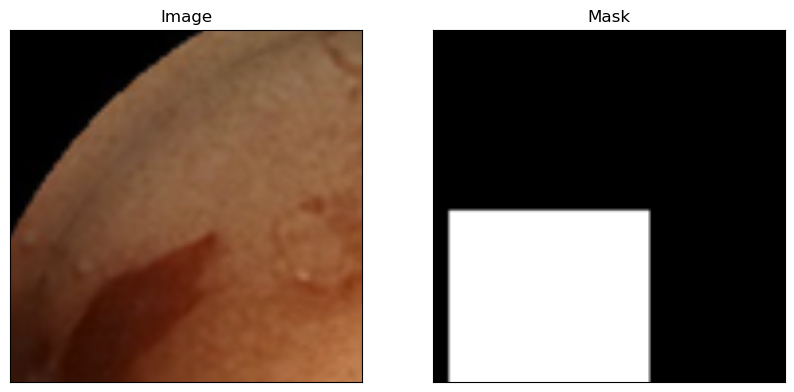

In [79]:
import matplotlib.pyplot as plt
import random

# Assuming you have loaded 'filtered_images' and 'filtered_masks' with the correct data

# Choose a random image index
img_num = random.randint(0, filtered_images.shape[0] - 1)
example_image = filtered_images[img_num]
example_mask = filtered_masks[img_num]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(example_image)
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the mask is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()


In [80]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

In [81]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs


In [23]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [82]:
# Create an instance of the SAMDataset
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [83]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)



pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [84]:
# Create a DataLoader instance for the training dataset
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)


In [85]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)


pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
input_boxes torch.Size([2, 1, 4])
ground_truth_mask torch.Size([2, 256, 256])


In [86]:

batch["ground_truth_mask"].shape

torch.Size([2, 256, 256])

In [69]:
# Load the model
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

In [87]:
from torch.optim import Adam
import torch
from tqdm import tqdm
from statistics import mean

# Define your desired loss function, for instance, Dice loss combined with Cross Entropy
class DiceCELoss(torch.nn.Module):
    def __init__(self):
        super(DiceCELoss, self).__init__()

    def forward(self, predicted, target):
        epsilon = 1e-7
        intersection = torch.sum(predicted * target)
        dice_loss = 1 - (2.0 * intersection + epsilon) / (torch.sum(predicted) + torch.sum(target) + epsilon)
        ce_loss = torch.nn.functional.binary_cross_entropy_with_logits(predicted, target)
        combined_loss = dice_loss + ce_loss
        return combined_loss

# Initialize the optimizer and the custom loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
seg_loss = DiceCELoss()

# Rest of the code remains the same as before
num_epochs = 1

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
        # forward pass
        outputs = model(pixel_values=batch["pixel_values"].to(device),
                        input_boxes=batch["input_boxes"].to(device),
                        multimask_output=False)

        # compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        ground_truth_masks = batch["ground_truth_mask"].float().to(device)
        loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        # backward pass (compute gradients of parameters w.r.t. loss)
        optimizer.zero_grad()
        loss.backward()

        # optimize
        optimizer.step()
        epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')


100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [57:51<00:00, 58.84s/it]

EPOCH: 0
Mean loss: -5166.492913197663


In [88]:
# Save the model's state dictionary to a file
torch.save(model.state_dict(), r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\SAM\sam_checkpoint.pth")

In [89]:
from transformers import SamModel, SamConfig, SamProcessor
import torch


# Load the model configuration
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# Create an instance of the model architecture with the loaded configuration
my_model = SamModel(config=model_config)
#Update the model by loading the weights from saved file.
my_model.load_state_dict(torch.load( r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\SAM\sam_checkpoint.pth"))

<All keys matched successfully>

In [90]:
# set the device to cuda if available, otherwise use cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
my_model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

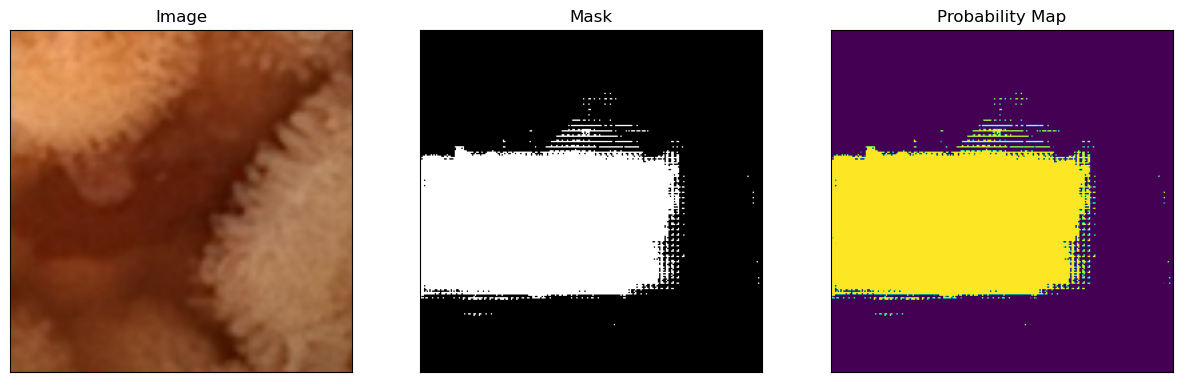

In [91]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

# let's take a random training example
idx = random.randint(0, filtered_images.shape[0]-1)

# load image
test_image = dataset[idx]["image"]

# get box prompt based on ground truth segmentation map
ground_truth_mask = np.array(dataset[idx]["label"])
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

my_model.eval()

# forward pass
with torch.no_grad():
    outputs = my_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

In [92]:
import cv2
import os

images_path = r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\test\masks"
output_path = r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\test\masks"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define the target size
target_size = (640, 640)  # Width x Height

# List all files in the images directory
image_files = os.listdir(images_path)

# Resize all images and save to the output directory
for img_file in image_files:
    img_path = os.path.join(images_path, img_file)
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)

    # Save the resized image to the output directory
    output_img_path = os.path.join(output_path, img_file)
    cv2.imwrite(output_img_path, resized_img)

print("All images resized and saved to:", output_path)


All images resized and saved to: C:\Users\HP\Desktop\Ultralytics_RTDeTr\test\masks


In [93]:
import cv2
import os
import numpy as np

def patchify_image(image, patch_size, step):
    patches = []
    img_height, img_width = image.shape[:2]

    for y in range(0, img_height - patch_size + 1, step):
        for x in range(0, img_width - patch_size + 1, step):
            # Ensure that patches are extracted within image boundaries
            patch = image[max(0, y):min(y + patch_size, img_height), max(0, x):min(x + patch_size, img_width)]
            patches.append(patch)

    return np.array(patches)


# Define paths for images and masks
images_path = r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\test\images"
masks_path = r"C:\Users\HP\Desktop\Ultralytics_RTDeTr\test\masks"

# List all files in the directory
image_files = os.listdir(images_path)
mask_files = os.listdir(masks_path)

# Define patch size and step
patch_size = 256
step = 256

# Initialize patches list
patches = []

# Load images and create patches
for img_file in image_files:
    img_path = os.path.join(images_path, img_file)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    patches_img = patchify_image(image, patch_size, step)
    patches.extend(patches_img)
# Convert patches list to a NumPy array
patches = np.array(patches)
# Transpose the dimensions
patches = patches.transpose(0, 3, 1, 2)  # Rearrange dimensions

print("Patches shape:", patches.shape)

Patches shape: (8, 3, 256, 256)


In [94]:


"""
input_points (torch.FloatTensor of shape (batch_size, num_points, 2)) —
Input 2D spatial points, this is used by the prompt encoder to encode the prompt.
Generally yields to much better results. The points can be obtained by passing a
list of list of list to the processor that will create corresponding torch tensors
of dimension 4. The first dimension is the image batch size, the second dimension
is the point batch size (i.e. how many segmentation masks do we want the model to
predict per input point), the third dimension is the number of points per segmentation
mask (it is possible to pass multiple points for a single mask), and the last dimension
is the x (vertical) and y (horizontal) coordinates of the point. If a different number
of points is passed either for each image, or for each mask, the processor will create
“PAD” points that will correspond to the (0, 0) coordinate, and the computation of the
embedding will be skipped for these points using the labels.

"""
# Define the size of your array
array_size = 256

# Define the size of your grid
grid_size = 15

# Generate the grid points
x = np.linspace(0, array_size-1, grid_size)
y = np.linspace(0, array_size-1, grid_size)

# Generate a grid of coordinates
xv, yv = np.meshgrid(x, y)

# Convert the numpy arrays to lists
xv_list = xv.tolist()
yv_list = yv.tolist()

# Combine the x and y coordinates into a list of list of lists
input_points = [[[int(x), int(y)] for x, y in zip(x_row, y_row)] for x_row, y_row in zip(xv_list, yv_list)]

#We need to reshape our nxn grid to the expected shape of the input_points tensor
# (batch_size, point_batch_size, num_points_per_image, 2),
# where the last dimension of 2 represents the x and y coordinates of each point.
#batch_size: The number of images you're processing at once.
#point_batch_size: The number of point sets you have for each image.
#num_points_per_image: The number of points in each set.
input_points = torch.tensor(input_points).view(1, 1, grid_size*grid_size, 2)

In [95]:
print(np.array(input_points).shape)

(1, 1, 225, 2)


In [96]:
patches.shape

(8, 3, 256, 256)

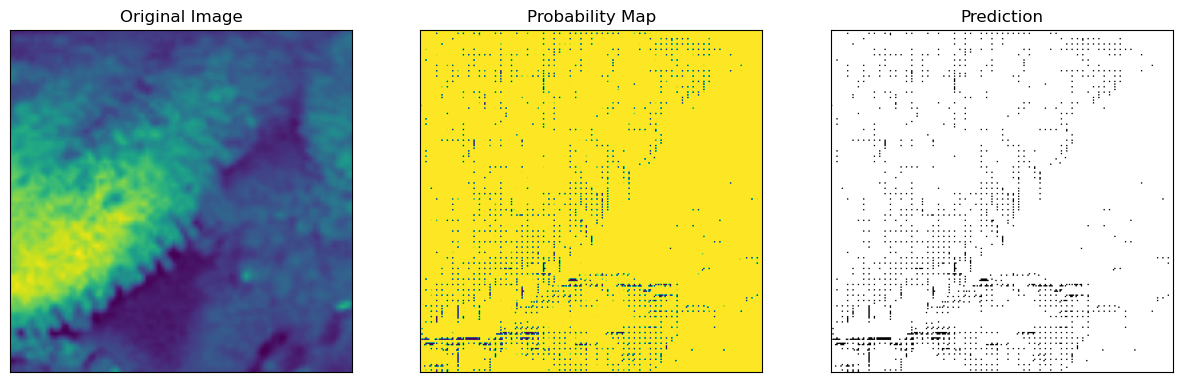

In [101]:

# Select a random patch for segmentation

# Compute the total number of 256x256 arrays
num_arrays = patches.shape[0] * patches.shape[1]
# Select a random index
index = np.random.choice(num_arrays)
# Compute the indices in the original array
i = index // patches.shape[1]
j = index % patches.shape[1]

#Or pick a specific patch for study.
# i, j = 2,1

# Selectelected patch for segmentation
random_array = patches[i, j]


single_patch = Image.fromarray(random_array)
# prepare image for the model

#First try without providing any prompt (no bounding box or input_points)
#inputs = processor(single_patch, return_tensors="pt")
#Now try with bounding boxes. Remember to uncomment.
inputs = processor(single_patch, input_points=input_points, return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}
my_model.eval()


# forward pass
with torch.no_grad():
  outputs = my_model(**inputs, multimask_output=False)

# apply sigmoid
single_patch_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
single_patch_prob = single_patch_prob.cpu().numpy().squeeze()

# Convert NumPy array to PIL Image
single_patch_pil = Image.fromarray(random_array)
threshold = 0.5

# Convert probability map to a binary mask
single_patch_prediction = (single_patch_prob > threshold).astype(np.uint8)
# Plotting the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the original image
axes[0].imshow(single_patch_pil)
axes[0].set_title("Original Image")


# Assuming single_patch_prob is the probability map and single_patch_prediction is the predicted mask
axes[1].imshow(single_patch_prob, cmap='viridis')
axes[1].set_title("Probability Map")

axes[2].imshow(single_patch_prediction, cmap='gray')
axes[2].set_title("Prediction")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

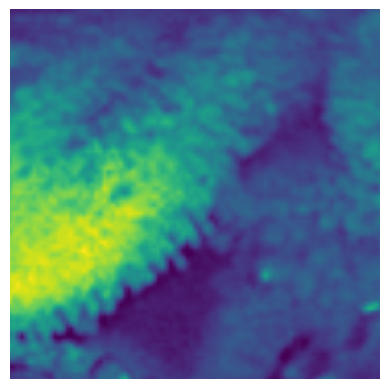

In [103]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming `random_array` contains the colored (RGB) image
# Convert the NumPy array to a PIL Image
single_patch_pil = Image.fromarray(random_array)

# Display the PIL Image using Matplotlib
plt.imshow(single_patch_pil)
plt.axis('off')  # Hide axis ticks and labels
plt.show()
